In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titled_players_raw.csv',index_col=0)

In [3]:
df.head()

,IDcode,Name,T,WT,Oth. T.,Fed,Rtg,Rpd,Blz,B-Year,S,F,Title
0,5813298,"Lim, Kok Ann",CM,,,SGP,,,,1920,M,,"['Candidate Master (CM)', '2012']"
1,4611870,"Keller-Hermann, Edith",WGM,WGM,,GER,2290,,,1921,F,i,"['Woman Grandmaster (WGM)', '1978', 'Woman Int..."
2,2002310,"Levy, Louis",FM,,,USA,2275,,,1921,M,i,[]
3,14100657,"Ousatchi, Mark",FM,,,GER,2157,,,1921,M,i,[]
4,4101529,"Averbakh, Yuri L",GM,,,RUS,2445,,,1922,M,i,"['Grandmaster (GM)', '1952', 'International Ma..."


In [4]:
# Informations à propos des colonnes
for i in df.columns[:12]:
    print(f"{i} : {df[i].unique()}")
    print("Nombre de valeurs unique:", len(df[i].unique()))
    print('\n')

IDcode : [ 5813298  4611870  2002310 ... 44599790   169013 13730150]
Nombre de valeurs unique: 19510


Name : [' Lim, Kok Ann' ' Keller-Hermann, Edith' ' Levy, Louis' ...
 ' Erdogmus, Yagiz Kaan' ' Schnaider, Ilan' ' Zhumagali, Raian']
Nombre de valeurs unique: 19486


T : [' CM' ' WGM' ' FM' ' GM' ' IM' ' WIM' ' WH' ' WFM' ' WCM']
Nombre de valeurs unique: 9


WT : [' ' ' WGM' ' WIM' ' WH' ' WFM' ' WCM']
Nombre de valeurs unique: 6


Oth. T. : [' ' ' FST' ' FT' ' FI' ' DI' ' NI' ' ,FST' ' IO']
Nombre de valeurs unique: 8


Fed : ['SGP' 'GER' 'USA' 'RUS' 'AUT' 'TUN' 'ARG' 'CZE' 'POL' 'NED' 'SRB' 'VEN'
 'SUI' 'BIH' 'ENG' 'EST' 'SLO' 'ISR' 'CRO' 'LAT' 'NCA' 'MEX' 'BUL' 'ITA'
 'BEL' 'MNE' 'HUN' 'FIN' 'UKR' 'IND' 'ROU' 'ESP' 'DEN' 'ISL' 'MDA' 'TKM'
 'CAN' 'FRA' 'NOR' 'PHI' 'AUS' 'ECU' 'SYR' 'LIE' 'ISV' 'MGL' 'BRA' 'GRE'
 'KGZ' 'ARM' 'SVK' 'SWE' 'GEO' 'MKD' 'TTO' 'BLR' 'UZB' 'COL' 'JPN' 'PER'
 'BER' 'IRI' 'ALG' 'THA' 'CUB' 'BAN' 'HKG' 'CHI' 'LTU' 'AFG' 'SCO' 'POR'
 'MNC' 'CHN' 'EGY' 'WLS' '

In [5]:
df[df['T'] == ' WH']

,IDcode,Name,T,WT,Oth. T.,Fed,Rtg,Rpd,Blz,B-Year,S,F,Title
19,1001710,"Vreeken, Corry",WH,WH,,NED,2080,,,1928,F,i,[]


Une seule personne à le titre de WH : woman honorable grandmaster , nous allons supprimer la ligne 

In [6]:
df = df.drop(19)

Comme on peut le voir il y'a plusieurs personnes portant le même nom/prénom 

In [7]:
df[df[['Name']].duplicated(keep=False)].sort_values(by='Name')

,IDcode,Name,T,WT,Oth. T.,Fed,Rtg,Rpd,Blz,B-Year,S,F,Title
3495,4128869,"Berezin, Viktor",FM,,,RUS,1890,1816,1790,1961,M,,"['Title', 'FIDE PB / Congress', 'Status', 'Int..."
3152,14107872,"Berezin, Viktor",FM,,,UKR,2307,2365,2310,1960,M,i,[]
882,900737,"Djukic, Zeljko",IM,,,SRB,2277,2356,2210,1948,M,,[]
2892,14505185,"Djukic, Zeljko",FM,,,CRO,2263,,2290,1959,M,i,"['FIDE Master (FM)', '2005']"
131,4601530,"Fischer, Johann",FM,,,GER,2063,,,1935,M,i,[]
3212,1600451,"Fischer, Johann",FM,,,AUT,2216,,,1960,M,i,[]
8343,305251,"Gross, David",IM,,,CZE,2373,,,1975,M,,"['International Master (IM)', '1995']"
9310,4628390,"Gross, David",IM,,,GER,2453,2433,,1978,M,i,"['International Master (IM)', '1999']"
9988,719382,"Horvath, Csaba",CM,,FI,HUN,2217,2060,2209,1980,M,,"['Candidate Master (CM)', '2013']"
5964,700118,"Horvath, Csaba",GM,,,HUN,2522,2539,2554,1968,M,,"['Grandmaster (GM)', '1993']"


In [8]:
df = df.reset_index(drop=True)

In [9]:
df = df.replace({' ':np.nan})

In [10]:
df.head()

,IDcode,Name,T,WT,Oth. T.,Fed,Rtg,Rpd,Blz,B-Year,S,F,Title
0,5813298,"Lim, Kok Ann",CM,NaN,NaN,SGP,NaN,NaN,NaN,1920,M,NaN,"['Candidate Master (CM)', '2012']"
1,4611870,"Keller-Hermann, Edith",WGM,WGM,NaN,GER,2290,NaN,NaN,1921,F,i,"['Woman Grandmaster (WGM)', '1978', 'Woman Int..."
2,2002310,"Levy, Louis",FM,NaN,NaN,USA,2275,NaN,NaN,1921,M,i,[]
3,14100657,"Ousatchi, Mark",FM,NaN,NaN,GER,2157,NaN,NaN,1921,M,i,[]
4,4101529,"Averbakh, Yuri L",GM,NaN,NaN,RUS,2445,NaN,NaN,1922,M,i,"['Grandmaster (GM)', '1952', 'International Ma..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19509 entries, 0 to 19508
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   IDcode   19509 non-null  int64 
 1   Name     19509 non-null  object
 2   T        19509 non-null  object
 3   WT       3928 non-null   object
 4   Oth. T.  105 non-null    object
 5   Fed      19509 non-null  object
 6   Rtg      19435 non-null  object
 7   Rpd      11811 non-null  object
 8   Blz      12074 non-null  object
 9   B-Year   19507 non-null  object
 10  S        19509 non-null  object
 11  F        8259 non-null   object
 12  Title    19509 non-null  object
dtypes: int64(1), object(12)
memory usage: 1.9+ MB


La colonne Oth. T. est vide à 99% et nous donne des informations sur les joueurs ayant reçu des titres pour l'arbritrage. Cela ne nous intéresse pas.

Eliminons la

In [12]:
df = df.drop('Oth. T.', axis=1)

La colonne WT est vide à 79%

In [13]:
df['WT'].value_counts(normalize=True, dropna=False)

NaN     0.798657
 WFM    0.091753
 WIM    0.043877
 WCM    0.041314
 WGM    0.024399
Name: WT, dtype: float64

Néanmoins 79% des titres sont détenus par les hommes

In [14]:
df['S'].value_counts(normalize=True)

M    0.797376
F    0.202624
Name: S, dtype: float64

Enlevons les espaces inutiles dans les colonnes de types object

In [15]:
cols = df.select_dtypes(include=['object']).columns
for col in cols:
    df[col] = df[col].str.strip()

In [16]:
df = df.rename(columns = {'IDcode':'id', 
           'Name':'nom',
           'T':'titre',
           'WT':'woman_titre',
           'Fed':'pays',
           'Rtg':'classique',
           'Rpd':'rapide',
           'Blz':'blitz',
           'B-Year':'naissance',
           'S':'sexe',
           'F':'actif',
           'Title':'titre_dates'
          })

In [17]:
df[['classique', 'rapide', 'blitz', 'naissance']] = df[['classique', 'rapide', 'blitz', 'naissance']].astype('float')

Remplaçons la colonne actif par 1 si le joueur est actif 0 sinon

In [18]:
df['actif'].value_counts()

i    8259
Name: actif, dtype: int64

A vérifier si l'in/activité des joueurs semble correct

In [19]:
df['actif'] = df['actif'].replace({'i':'0',np.nan:'1'})


Il faut réfléchir à comment remplacer les obtentions de titres de chaque joueur 

In [20]:
df.iloc[df['titre'].apply(lambda x:len(x)).sort_values(ascending=False)[:100].index].head()

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates
9754,2219824,"Redondo Arguelles, Graciela",WFM,WFM,ESP,2031.0,1984.0,NaN,1979.0,F,1,"['Woman FIDE Master (WFM)', '2004', 'Title', '..."
11933,13703340,"Uskova, Tatyana",WFM,WFM,KAZ,2126.0,NaN,NaN,1985.0,F,0,"['Woman FIDE Master (WFM)', '2004']"
11971,8602905,"Zhou, Guijue",WIM,WIM,CHN,2225.0,2178.0,NaN,1985.0,F,1,"['Woman International Master (WIM)', '2013', '..."
11968,14105560,"Zemlickova, Olena",WIM,WIM,CZE,2014.0,2122.0,2102.0,1985.0,F,1,"['Woman International Master (WIM)', '2015', '..."
11965,12801496,"Zaksaite, Salomeja",WIM,WIM,LTU,2202.0,2140.0,2002.0,1985.0,F,0,"['Woman International Master (WIM)', '2003']"


Il semblerait que lorsqu'il y'a le mot 'Title' dans la colonne titre_dates, les informations ne sont pas utiles

In [21]:
df.head()

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates
0,5813298,"Lim, Kok Ann",CM,NaN,SGP,NaN,NaN,NaN,1920.0,M,1,"['Candidate Master (CM)', '2012']"
1,4611870,"Keller-Hermann, Edith",WGM,WGM,GER,2290.0,NaN,NaN,1921.0,F,0,"['Woman Grandmaster (WGM)', '1978', 'Woman Int..."
2,2002310,"Levy, Louis",FM,NaN,USA,2275.0,NaN,NaN,1921.0,M,0,[]
3,14100657,"Ousatchi, Mark",FM,NaN,GER,2157.0,NaN,NaN,1921.0,M,0,[]
4,4101529,"Averbakh, Yuri L",GM,NaN,RUS,2445.0,NaN,NaN,1922.0,M,0,"['Grandmaster (GM)', '1952', 'International Ma..."


In [22]:
# # Change la colonne titre_dates de str à list
df.loc[df['titre_dates'].dropna().index, 'titre_dates'] = df['titre_dates'].dropna().apply(lambda x: ast.literal_eval(x))

In [23]:
def remove_titre(titre_list):
    """Enlève tout les éléments de la lise si 'Title' est présent dans titre_list
    Args :
        titre_list (list): liste de la colonne df['titre_dates']
    
        Returns:
            list : liste modifié si modifications nécessaires, sinon la liste sans changement
        
    
    """
    if 'Title' in titre_list:
        return titre_list[:titre_list.index('Title')]
    return titre_list

In [24]:
df.loc[df['titre_dates'].dropna().apply(remove_titre).index, 'titre_dates'] = df['titre_dates'].dropna().apply(remove_titre)

In [25]:
df['titre_dates'] = df['titre_dates'].apply(lambda x: np.nan if (len(x)==0) else x)

Ca à l'air d'être bon

In [26]:
new_cols = [
            'Woman Candidate Master (WCM)',
            'Candidate Master (CM)',
            'Woman FIDE Master (WFM)',
            'FIDE Master (FM)',
            'Woman International Master (WIM)',
            'International Master (IM)',
            'Woman Grandmaster (WGM)',
            'Grandmaster (GM)'
           ]
dict_cols = {}
for col in new_cols:
    dict_cols[col] = np.nan
dict_default = dict_cols.copy()

In [27]:
# for titre_dates,idx in zip(df['titre_dates'].dropna(),df['titre_dates'].dropna():
#     titre_reshaped = np.reshape(titre_dates, (-1,2))
# #     print(titre_reshaped)
#     dict_cols = dict_default.copy()
#     for i in titre_reshaped:
#         title = i[0]
#         year = i[1]
#         dict_cols[title] = year


In [28]:
def fill_columns(titre_dates):
    titre_reshaped = np.reshape(titre_dates, (-1,2))
    dict_cols = dict_default.copy()
    for i in titre_reshaped:
        title = i[0]
        year = i[1]
        dict_cols[title] = year
    return dict_cols

In [29]:
dict_tofill = df['titre_dates'].dropna().apply(fill_columns)
for i in dict_tofill.index:
    df.loc[i, dict_tofill[i].keys()] = dict_tofill[i].values()


Environ 80% des joueurs titrés ont une information concernant l'année d'obtention de titre, cela reste satisfaisant 

In [31]:
df_english = df.rename(columns = {
           'nom':'name',
           'titre':'title',
           'woman_titre':'woman_title',
           'pays':'country',
           'classique':'classical',
           'rapide':'rapid',
           'naissance':'birth_year',
           'sexe':'sex',
           'actif':'active',
           'titre_dates':'title_dates'
          }).copy()

In [36]:
df_english = df_english.drop('title_dates', axis=1)

In [38]:
df_english.to_csv('chess_titled_players.csv')

In [40]:
df_english.columns

Index(['id', 'name', 'title', 'woman_title', 'country', 'classical', 'rapid',
       'blitz', 'birth_year', 'sex', 'active', 'Woman Candidate Master (WCM)',
       'Candidate Master (CM)', 'Woman FIDE Master (WFM)', 'FIDE Master (FM)',
       'Woman International Master (WIM)', 'International Master (IM)',
       'Woman Grandmaster (WGM)', 'Grandmaster (GM)'],
      dtype='object')

In [41]:
(df[new_cols].notnull().sum(axis=1) != 0).sum() / df.shape[0] * 100

78.90204520990312

Essayons de voir la répartion selon l'âge des joueurs qui n'ont pas d'année d'obtention de titre

In [42]:
df.head(1)

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates,Woman Candidate Master (WCM),Candidate Master (CM),Woman FIDE Master (WFM),FIDE Master (FM),Woman International Master (WIM),International Master (IM),Woman Grandmaster (WGM),Grandmaster (GM)
0,5813298,"Lim, Kok Ann",CM,NaN,SGP,NaN,NaN,NaN,1920.0,M,1,"[Candidate Master (CM), 2012]",NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_no_year_title = df[(df[new_cols].notnull().sum(axis=1) == 0)].copy()

In [44]:
df_no_year_title.head()

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates,Woman Candidate Master (WCM),Candidate Master (CM),Woman FIDE Master (WFM),FIDE Master (FM),Woman International Master (WIM),International Master (IM),Woman Grandmaster (WGM),Grandmaster (GM)
2,2002310,"Levy, Louis",FM,NaN,USA,2275.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14100657,"Ousatchi, Mark",FM,NaN,GER,2157.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4103424,"Khasin, Abram",IM,NaN,RUS,2318.0,NaN,NaN,1923.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4128575,"Kukharev, Nikolay",FM,NaN,RUS,2214.0,NaN,NaN,1923.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1602470,"Nowotny, Heinz",FM,NaN,AUT,2255.0,NaN,NaN,1923.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


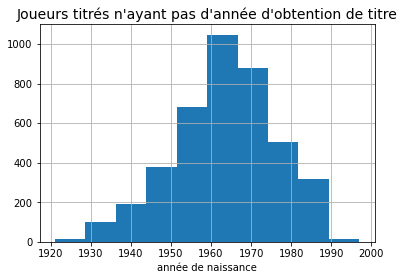

In [45]:
df_no_year_title['naissance'].hist()
plt.title("Joueurs titrés n'ayant pas d'année d'obtention de titre", size=14)
plt.xlabel('année de naissance')
plt.show()

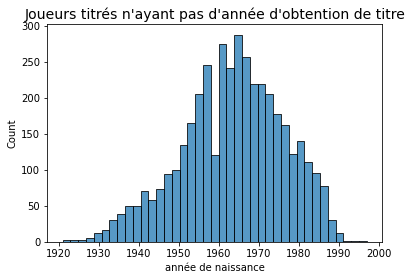

In [46]:
sns.histplot(data = df_no_year_title['naissance'])
plt.title("Joueurs titrés n'ayant pas d'année d'obtention de titre", size=14)
plt.xlabel('année de naissance')
plt.show()

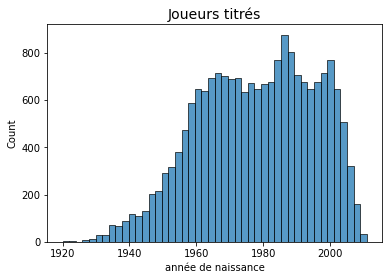

In [47]:
sns.histplot(data = df['naissance'])
plt.title("Joueurs titrés", size=14)
plt.xlabel('année de naissance')
plt.show()

In [49]:
df.head(1)

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates,Woman Candidate Master (WCM),Candidate Master (CM),Woman FIDE Master (WFM),FIDE Master (FM),Woman International Master (WIM),International Master (IM),Woman Grandmaster (WGM),Grandmaster (GM)
0,5813298,"Lim, Kok Ann",CM,NaN,SGP,NaN,NaN,NaN,1920.0,M,1,"[Candidate Master (CM), 2012]",NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df['classique'].isnull().sum() / df.shape[0] * 100

0.3793121123583987

In [51]:
df['rapide'].isnull().sum() / df.shape[0] * 100

39.458711363985856

In [52]:
df['blitz'].isnull().sum() / df.shape[0] * 100

38.11061561330668

Table depuis 1920

In [62]:
df.pivot_table(values='classique', index='titre').sort_values(by='classique')

,classique
titre,
WCM,1671.319588
WFM,2004.880521
CM,2018.622374
WIM,2113.243081
WGM,2237.605678
FM,2240.830739
IM,2350.801598
GM,2503.067396


Essayons de voir des années plus récentes

In [81]:
df[df['titre']== 'WFM'].head()

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates,Woman Candidate Master (WCM),Candidate Master (CM),Woman FIDE Master (WFM),FIDE Master (FM),Woman International Master (WIM),International Master (IM),Woman Grandmaster (WGM),Grandmaster (GM)
25,4149289,"Trotsenko, Evgenia",WFM,WFM,RUS,1937.0,1909.0,1840.0,1929.0,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,4145798,"Bykova, Evgeniya",WFM,WFM,RUS,1995.0,NaN,NaN,1935.0,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,4608798,"Cohn, Irina",WFM,WFM,GER,2042.0,NaN,NaN,1935.0,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,4143884,"Kiparenko, Galina",WFM,WFM,RUS,2043.0,NaN,NaN,1937.0,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,4608658,"Laakmann, Anni",WFM,WFM,GER,2185.0,NaN,NaN,1937.0,F,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
df[(df['actif']=='1') &(df['naissance']>1970)].pivot_table(values='classique', index='titre').sort_values(by='classique')

,classique
titre,
WCM,1657.839416
WFM,1981.169782
CM,2016.117845
WIM,2113.322581
WGM,2256.137255
FM,2261.469260
IM,2380.673125
GM,2535.922051


In [71]:
df[df['naissance']>1980].pivot_table(values='classique', index='titre').sort_values(by='classique')

,classique
titre,
WCM,1658.661517
CM,1989.247498
WFM,1992.245166
WIM,2123.683230
WGM,2255.276243
FM,2266.549558
IM,2391.246728
GM,2546.533416


In [82]:
df['age'] = 2021 - df['naissance']

In [88]:
df[(df['actif'] == '1') & (df['naissance']>1980)].pivot_table(values='age', index='titre').sort_values(by='age')

,age
titre,
WCM,19.352113
CM,23.381148
WFM,23.836700
FM,26.563202
WIM,26.838488
IM,28.683074
GM,30.479433
WGM,30.559055
